In [1]:
!conda activate deeplearning

In [2]:
import scipy.io
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
#import soundfile as sf
#import librosa

import pywt

In [6]:
# load numpy array from csv file
from numpy import loadtxt
from numpy import load
# load array 
data_load_audio_data = loadtxt('data_audio_data3.csv', delimiter=',')
data_load_labels = loadtxt('data_labels3.csv', delimiter=',')
#features = loadtxt('data_features_1000x1000.csv')
coef_all = load('data_coeff_512.npy')

In [7]:
audio_data = np.empty((0, 1024))
labels = np.empty((0, ))
for j in range(data_load_audio_data.shape[0]):
    for i in range(data_load_audio_data.shape[1] // 1024):
        k = i*1024
        audio_data = np.append(audio_data, [data_load_audio_data[j][k:k+1024]], axis = 0)
        labels = np.append(labels, [data_load_labels[j]], axis = 0)

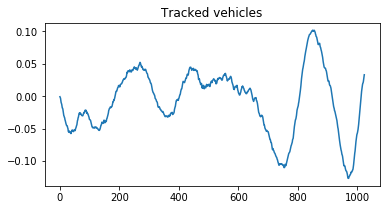

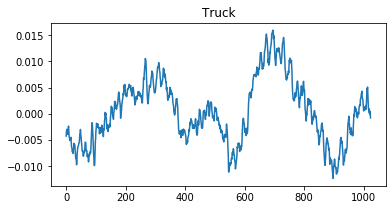

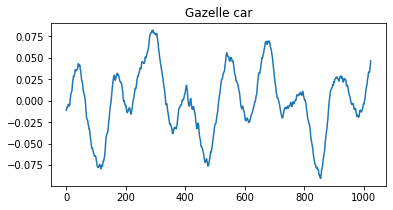

In [31]:
plt.figure(1, figsize=(6,3))
plt.plot(audio_data[1])
plt.title('Tracked vehicles')

plt.figure(2, figsize=(6,3))
plt.plot(audio_data[240])
plt.title('Truck')

plt.figure(3, figsize=(6,3))
plt.plot(audio_data[400])
plt.title('Gazelle car')

plt.show()

In [9]:
scales = np.arange(1, 512+1, 1)
coeff1, freqs1 = pywt.cwt(audio_data[1], scales, 'morl')
coeff2, freqs2 = pywt.cwt(audio_data[240], scales, 'morl')
coeff3, freqs3 = pywt.cwt(audio_data[400], scales, 'morl')

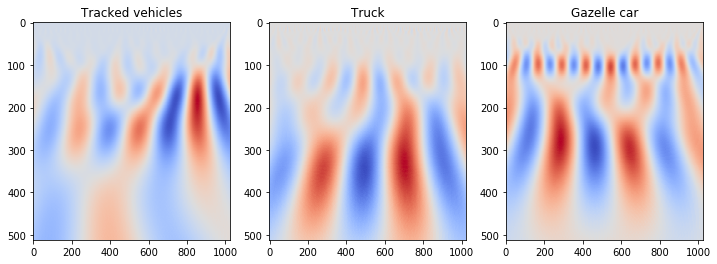

In [34]:
plt.figure(1, figsize=(12,4))
plt.subplot(131)
plt.imshow(coeff1, cmap='coolwarm', aspect='auto') 
plt.title('Tracked vehicles')
plt.subplot(132)
plt.imshow(coeff2, cmap='coolwarm', aspect='auto') 
plt.title('Truck')
plt.subplot(133)
plt.imshow(coeff3, cmap='coolwarm', aspect='auto') 
plt.title('Gazelle car')

plt.show() 

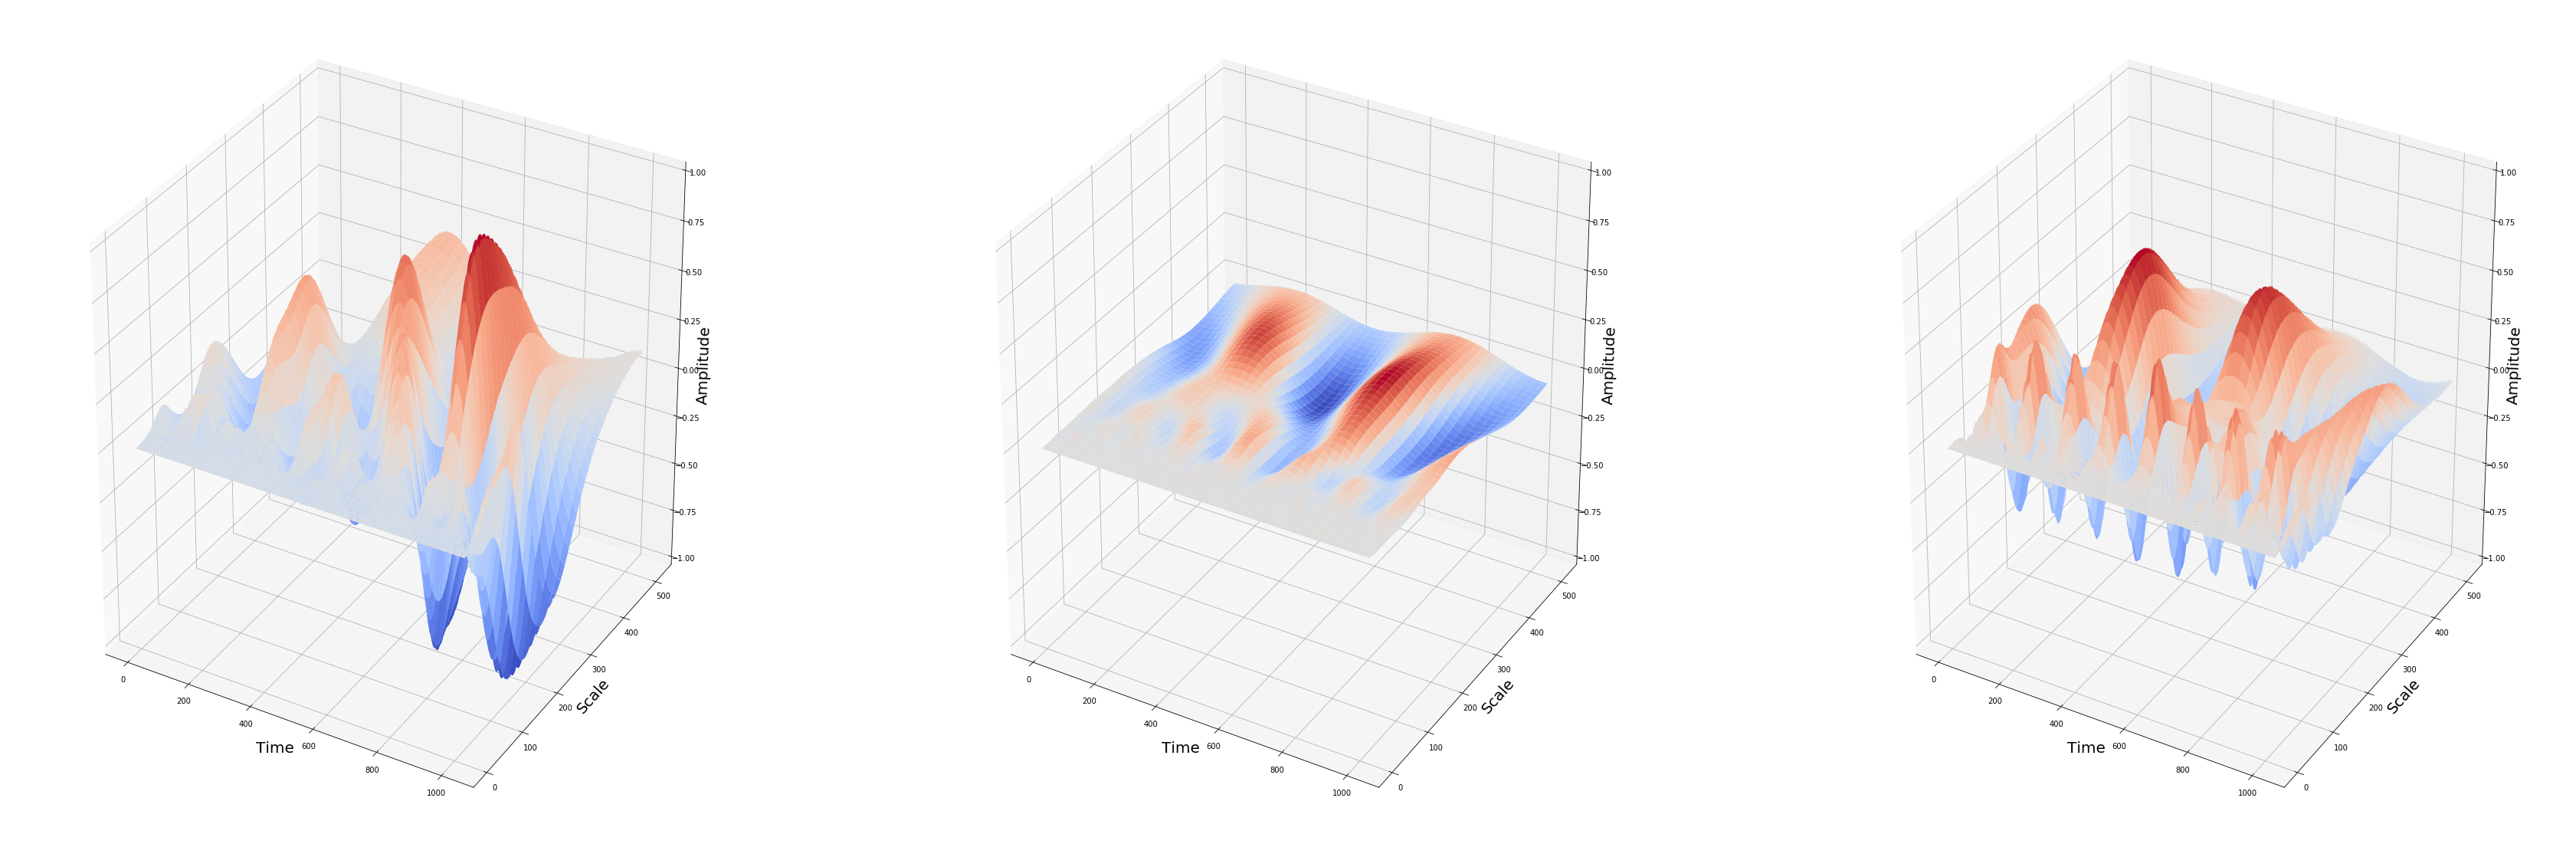

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(60,20))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')

Y = np.arange(1, 513, 1)
X = np.arange(1, 1025, 1)

X, Y = np.meshgrid(X, Y)

ax1.plot_surface(X, Y, coeff1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax1.set_xlabel("Time", fontsize=20)
ax1.set_ylabel("Scale", fontsize=20)
ax1.set_zlabel("Amplitude", fontsize=20)
ax1.set_zlim3d(-1,1)

ax2 = fig.add_subplot(1, 3, 2, projection='3d')

ax2.plot_surface(X, Y, coeff2, cmap=cm.coolwarm, linewidth=0, antialiased=True)


ax2.set_xlabel("Time", fontsize=20)
ax2.set_ylabel("Scale", fontsize=20)
ax2.set_zlabel("Amplitude", fontsize=20)
ax2.set_zlim3d(-1,1)

ax3= fig.add_subplot(1, 3, 3, projection='3d')

ax3.plot_surface(X, Y, coeff3, cmap=cm.coolwarm, linewidth=0, antialiased=True)


ax3.set_xlabel("Time", fontsize=20)
ax3.set_ylabel("Scale", fontsize=20)
ax3.set_zlabel("Amplitude", fontsize=20)
ax3.set_zlim3d(-1,1)

plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

features = np.empty((0,512))

for ind in range(len(audio_data)):
    print('.', end='')
    #coeff, freqs = pywt.cwt(audio_data[ind][:1000], scales, 'morl')  
    coeff = coef_all[ind]
    features = np.vstack([features, pca.fit_transform(coeff).flatten()])

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=7)

In [14]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = clf.predict(X_test)
print("Accuracy : %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy : 91.15%


Accuracy: 91.15%


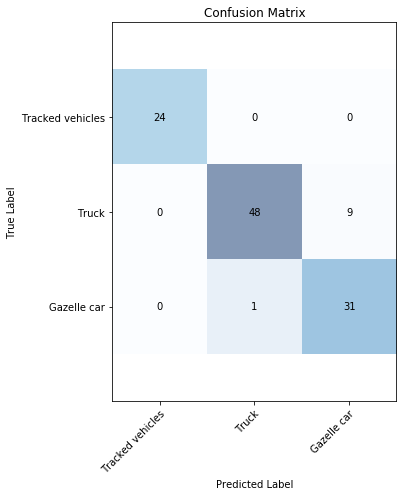

In [18]:
import seaborn as sns
from sklearn import metrics


n_labels = [1,2,3]
LABEL_NAMES = ['Tracked vehicles','Truck','Gazelle car']
def create_confusion_matrix(y_pred, y_test):    
    #calculate the confusion matrix
    confmat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(confmat, cmap=plt.cm.Blues, alpha=0.5)

    n_labels = len(LABEL_NAMES)
    ax.set_xticks(np.arange(n_labels))
    ax.set_yticks(np.arange(n_labels))
    ax.set_xticklabels(LABEL_NAMES)
    ax.set_yticklabels(LABEL_NAMES)

    # rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # loop over data dimensions and create text annotations.
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=i, y=j, s=confmat[i, j], va='center', ha='center')
    
    # avoid that the first and last row cut in half
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

# make predictions for test data
y_pred = clf.predict(X_test)
#print("Accuracy : %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
#y_pred = model.predict_classes(X_test)
# determine the total accuracy 
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

create_confusion_matrix(y_pred, y_test)
